<a href="https://colab.research.google.com/github/unnatibhalia/Project/blob/main/Untitled26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geemap

In [ ]:
import geemap

In [ ]:
import pandas as pd

In [ ]:
import ee


In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=g4zweKV-tPkOaTqcFRbtYPCIt8L1iF7tNe4wN26jJa4&tc=g9l57mZNkFDZlPNxIPQuEWPQ4qi4gc7asj_g9AC6RQY&cc=sEtH3Ie2sDsXeUI2f0Q7MHmMBcMI7vvvt-aQo4KSRLE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk5U_5napT0mRQVz4Kl65ElTyyCVKkPvVOJ45_Q8ZLtdRodW6pbUxAc

Successfully saved authorization token.


In [ ]:
# Define polygon feature collection
feature_collection = ee.FeatureCollection("projects/ee-unnatiisro/assets/wheat_all")


In [ ]:
feature_collection

In [ ]:
pip install geopandas

# **1. Feature_Collection To Geometry.MultiPolygon**

---












In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon

# Load the feature collection using Earth Engine
fc = feature_collection

# Convert the geometry to a list of Polygon objects
polygons = []
for feat in fc.getInfo()['features']:
    geom = feat['geometry']['coordinates']
    if feat['geometry']['type'] == 'Polygon':
        poly = Polygon(geom[0])
        if not poly.is_valid:
            poly = poly.buffer(0)
        polygons.append(poly)
    elif feat['geometry']['type'] == 'MultiPolygon':
        for subgeom in geom:
            poly = Polygon(subgeom[0])
            if not poly.is_valid:
                poly = poly.buffer(0)
            polygons.append(poly)

# Extract the exterior coordinates from each Polygon object
x_coords = []
y_coords = []
for poly in polygons:
    exterior_coords = poly.exterior.coords
    x_coords.extend(list(exterior_coords.xy[0]))
    y_coords.extend(list(exterior_coords.xy[1]))

# Print the x and y coordinates
print('x coordinates:', x_coords)
print('y coordinates:', y_coords)


x coordinates: [77.26881024055568, 77.26973326357874, 77.26885039882806, 77.26881024055568, 77.11152878737245, 77.11205496073686, 77.11205943842452, 77.11152878737245, 77.03353913510138, 77.03448893279149, 77.03357480426422, 77.03353913510138, 75.79226808230524, 75.79274523847192, 75.79234391299207, 75.79226808230524, 77.42874483313858, 77.4287537643955, 77.42965003877356, 77.42960538282956, 77.42874483313858, 77.42335373006925, 77.42335819590674, 77.42422325163609, 77.42420994178845, 77.42335373006925, 77.38392634906339, 77.38397986979804, 77.38460415974832, 77.38461756175471, 77.38392634906339, 77.24430298184514, 77.24466869070052, 77.24481137823621, 77.24480243286413, 77.24430298184514, 77.22845985869208, 77.22973956814815, 77.22974851466302, 77.22848213750862, 77.22845985869208, 77.46197402937673, 77.46208992703203, 77.46320031517362, 77.46322254908735, 77.46197402937673, 77.45119188423652, 77.4512543908211, 77.4517894598004, 77.45171811157758, 77.45119188423652, 77.45323418611937,

In [ ]:
# Convert the geometry to a list of Polygon objects
polygons = []
fc = feature_collection
for feat in fc.getInfo()['features']:
    geom = feat['geometry']['coordinates']
    if feat['geometry']['type'] == 'Polygon':
        poly = Polygon(geom[0])
        if not poly.is_valid:
            poly = poly.buffer(0)
        polygons.append(poly)
    elif feat['geometry']['type'] == 'MultiPolygon':
        for subgeom in geom:
            poly = Polygon(subgeom[0])
            if not poly.is_valid:
                poly = poly.buffer(0)
            polygons.append(poly)

# Extract the exterior coordinates from each Polygon object
poly_coords = []
for poly in polygons:
    exterior_coords = poly.exterior.coords
    x_coords = list(exterior_coords.xy[0])
    y_coords = list(exterior_coords.xy[1])
    poly_coords.append(list(zip(x_coords, y_coords)))

# Print the coordinates for each polygon
for i, coords in enumerate(poly_coords):
    print(f'Polygon {i+1} coordinates:', coords)

# Check that poly_coords is not empty
if poly_coords:
    roi = ee.Geometry.MultiPolygon(poly_coords)
else:
    print("poly_coords is empty, cannot create MultiPolygon")


Polygon 1 coordinates: [(77.26881024055568, 30.3168974301835), (77.26973326357874, 30.316884050474766), (77.26885039882806, 30.317517266942296), (77.26881024055568, 30.3168974301835)]
Polygon 2 coordinates: [(77.11152878737245, 29.391839090065005), (77.11205496073686, 29.391121149377145), (77.11205943842452, 29.39185244799454), (77.11152878737245, 29.391839090065005)]
Polygon 3 coordinates: [(77.03353913510138, 29.71271600316079), (77.03448893279149, 29.713291228080326), (77.03357480426422, 29.713933360530014), (77.03353913510138, 29.71271600316079)]
Polygon 4 coordinates: [(75.79226808230524, 29.062391784675576), (75.79274523847192, 29.062775235533003), (75.79234391299207, 29.062802052666918), (75.79226808230524, 29.062391784675576)]
Polygon 5 coordinates: [(77.42874483313858, 30.251669711714257), (77.4287537643955, 30.25128619590924), (77.42965003877356, 30.251366505867885), (77.42960538282956, 30.251642904787), (77.42874483313858, 30.251669711714257)]
Polygon 6 coordinates: [(77.423

In [ ]:
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.MultiPolygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              [
                77.26881024055568,
                30.3168974301835
              ],
              [
                77.26973326357874,
                30.316884050474766
              ],
              [
                77.26885039882806,
                30.317517266942296
              ],
              [
                77.26881024055568,
                30.3168974301835
              ]
            ],
            [
              [
                77.11152878737245,
                29.391839090065005
              ],
              [
                77.11205496073686,
                29.391121149377145
              ],
              [
                77.11205943842452,
                29.39185244799454
              ],
              [
                77.11152878737245,
                29.391839090065005
              ]
            ],
            [
              [
                77.03353913510138,
                29.71271600316079
              ],
              [
                77.03448893279149,
                29.713291228080326
              ],
              [
                77.03357480426422,
                29.713933360530014
              ],
              [
                77.03353913510138,
                29.71271600316079
              ]
            ],
            [
              [
                75.79226808230524,
                29.062391784675576
              ],
              [
                75.79274523847192,
                29.062775235533003
              ],
              [
                75.79234391299207,
                29.062802052666918
              ],
              [
                75.79226808230524,
                29.062391784675576
              ]
            ],
            [
              [
                77.42874483313858,
                30.251669711714257
              ],
              [
                77.4287537643955,
                30.25128619590924
              ],
              [
                77.42965003877356,
                30.251366505867885
              ],
              [
                77.42960538282956,
                30.251642904787
              ],
              [
                77.42874483313858,
                30.251669711714257
              ]
            ],
            [
              [
                77.42335373006925,
                30.241065950280454
              ],
              [
                77.42335819590674,
                30.240352470746274
              ],
              [
                77.42422325163609,
                30.240325765304192
              ],
              [
                77.42420994178845,
                30.241039167595176
              ],
              [
                77.42335373006925,
                30.241065950280454
              ]
            ],
            [
              [
                77.38392634906339,
                30.246978745819284
              ],
              [
                77.38397986979804,
                30.246474838931363
              ],
              [
                77.38460415974832,
                30.246465938850832
              ],
              [
                77.38461756175471,
                30.246996538840904
              ],
              [
                77.38392634906339,
                30.246978745819284
              ]
            ],
            [
              [
                77.24430298184514,
                30.33880946761607
              ],
              [
                77.24466869070052,
                30.338488428842677
              ],
              [
                77.24481137823621,
                30.338492822645787
              ],
              [
                77.24480243286413,
                30.338791638217085
              ],
              [

# **NDVI (Day wise)**

In [ ]:
import pandas as pd

# Define the function to add NDVI band to the image
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Define the start and end dates
start_date = '2019-11-15'
end_date = '2020-04-30'

# Convert poly_coords to a list of tuples
poly_coords = [tuple(coords) for coords in poly_coords]

# Create a list to hold the NDVI values for each polygon and date
ndvi_values_list = []
for coords in poly_coords:
    # Create a polygon geometry for the coordinates
    polygon = ee.Geometry.Polygon(coords)

    # Filter the image collection by date and location, and map the NDVI function
    S2_g = S2.filterDate(start_date, end_date).filterBounds(polygon).map(add_ndvi)

    # Get a list of dates in the image collection
    dates = S2_g.aggregate_array('system:time_start').getInfo()

    # Create an empty dictionary to hold the NDVI values for each date
    ndvi_dict = {}

    # Get the NDVI values for each date in the image collection
    for date in dates:
        date = ee.Date(date)
        image = S2_g.filterDate(date, date.advance(1, 'day')).first()
        ndvi = image.select('NDVI').reduceRegion(reducer=ee.Reducer.mean(), geometry=polygon, scale=10).get('NDVI').getInfo()
        ndvi_dict[str(date.format('YYYY-MM-dd').getInfo())] = ndvi

    # Create a pandas dataframe with the dates and NDVI values for the polygon
    df = pd.DataFrame({'date': pd.to_datetime(list(ndvi_dict.keys())), 'ndvi': list(ndvi_dict.values())})

    # Set the index to the date column
    df = df.set_index('date')

    # Add the polygon coordinates to the dataframe
    df['Coordinates'] = str(coords)

    # Append the dataframe to the list for all polygons
    ndvi_values_list.append(df)

# Concatenate all dataframes in the list into a single dataframe
df_polygons = pd.concat(ndvi_values_list)

# Pivot the dataframe to have the dates as columns and the polygons as rows
df_pivot = df_polygons.pivot_table(index=['Coordinates'], columns=df_polygons.index.date, values='ndvi').reset_index()

# Rename the columns to be more descriptive
df_pivot.columns.name = ''
df_pivot = df_pivot.rename(columns={'Coordinates': 'Polygon Coordinates'})


# **2. NDVI (15 days Interval)**
--------------


In [ ]:
S2 = ee.ImageCollection('COPERNICUS/S2_SR')

# Define the start and end dates
start_date = '2019-11-15'
end_date = '2020-04-30'

In [ ]:
import pandas as pd

# Define the function to add NDVI band to the image
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Define the start and end dates
start_date = '2019-11-15'
end_date = '2020-04-30'

# Create a list to hold the NDVI values for each polygon and date
ndvi_values_list = []
for coords in poly_coords:
    # Create a polygon geometry for the coordinates
    polygon = ee.Geometry.Polygon(coords)

    # Filter the image collection by date and location, and map the NDVI function
    S2_g = S2.filterDate(start_date, end_date).filterBounds(polygon).map(add_ndvi)

    # Get a list of dates in the image collection
    dates = S2_g.aggregate_array('system:time_start').getInfo()

    # Create an empty dictionary to hold the NDVI values for each date
    ndvi_dict = {}

    # Get the NDVI values for each date in the image collection
    for date in dates:
        date = ee.Date(date)
        image = S2_g.filterDate(date, date.advance(1, 'day')).first()
        ndvi = image.select('NDVI').reduceRegion(reducer=ee.Reducer.mean(), geometry=polygon, scale=10).get('NDVI').getInfo()
        ndvi_dict[str(date.format('YYYY-MM-dd').getInfo())] = ndvi

    # Replace NaN values with the max NDVI value
    mean_ndvi = pd.Series(list(ndvi_dict.values())).max()
    ndvi_dict = {k: (mean_ndvi if pd.isna(v) else v) for k, v in ndvi_dict.items()}

    # Create a pandas dataframe with the dates and NDVI values for the polygon
    df = pd.DataFrame({'date': pd.to_datetime(list(ndvi_dict.keys())), 'ndvi': list(ndvi_dict.values())})

    # Set the index to the date column
    df = df.set_index('date')

    # Add the polygon coordinates to the dataframe
    df['Coordinates'] = str(coords)

    # Calculate the 15-day interval NDVI values
    df_15d = df.resample('15D').mean().dropna()

    # Add the polygon coordinates to the dataframe
    df_15d['Coordinates'] = str(coords)

    # Append the dataframe to the list for all polygons
    ndvi_values_list.append(df_15d)

# Concatenate all dataframes in the list into a single dataframe
df_polygons = pd.concat(ndvi_values_list)



<ipython-input-13-b33f79de43e7>:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_15d = df.resample('15D').mean().dropna()
<ipython-input-13-b33f79de43e7>:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_15d = df.resample('15D').mean().dropna()
<ipython-input-13-b33f79de43e7>:48: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_15d = df.resample('15D').mean().dropna()
<ipython-input-13-b33f79de43e7>:48: FutureW

In [ ]:

df_polygons

ndvi                                        Coordinates
date                                                                   
2019-11-16  0.169261  [(77.26881024055568, 30.3168974301835), (77.26...
2019-12-01  0.376400  [(77.26881024055568, 30.3168974301835), (77.26...
2019-12-16 -0.011487  [(77.26881024055568, 30.3168974301835), (77.26...
2019-12-31  0.417702  [(77.26881024055568, 30.3168974301835), (77.26...
2020-01-15 -0.016603  [(77.26881024055568, 30.3168974301835), (77.26...
...              ...                                                ...
2020-02-29  0.648908  [(75.97373571071829, 28.535491016264913), (75....
2020-03-15  0.491989  [(75.97373571071829, 28.535491016264913), (75....
2020-03-30  0.350261  [(75.97373571071829, 28.535491016264913), (75....
2020-04-14  0.129463  [(75.97373571071829, 28.535491016264913), (75....
2020-04-29  0.164547  [(75.97373571071829, 28.535491016264913), (75....

[1872 rows x 2 columns]

In [ ]:
# Pivot the dataframe to have the dates as columns and the polygons as rows
interval_dates = pd.date_range(start=df_polygons.index.min(), end=df_polygons.index.max(), freq='15D')
df_pivot = df_polygons[df_polygons.index.isin(interval_dates)].pivot_table(
    index=['Coordinates'],
    columns=df_polygons.index.date[df_polygons.index.isin(interval_dates)],
    values='ndvi').reset_index()

# Rename the columns to be more descriptive
df_pivot.columns.name = ''
df_pivot = df_pivot.rename(columns={'Coordinates': 'Polygon Coordinates'})



In [ ]:
df_pivot.to_csv('df_pivot.csv')

df_pivot

Polygon Coordinates  2019-11-16  \
0    [(75.71498740425533, 29.45409703865067), (75.7...    0.117053   
1    [(75.73595853369464, 28.865138963906393), (75....    0.102954   
2    [(75.73763960941166, 28.825595672372085), (75....    0.140464   
3    [(75.79226808230524, 29.062391784675576), (75....    0.114441   
4    [(75.86000631724579, 29.094720261433793), (75....    0.144795   
..                                                 ...         ...   
140  [(77.43683364125656, 28.281068066622858), (77....    0.075652   
141  [(77.45119188423652, 28.38327511302372), (77.4...    0.086185   
142  [(77.45323418611937, 28.27952968033599), (77.4...    0.314878   
143  [(77.46107774438613, 28.377897492988065), (77....    0.090391   
144  [(77.46197402937673, 28.332601889077402), (77....    0.105660   

     2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  2020-02-14  \
0      0.153823    0.015387    0.204209    0.338795    0.748971    0.594371   
1      0.239861    0.014006    0.312469    0.349097    0.628512    0.665209   
2      0.244517    0.031799    0.268351    0.319174    0.575484    0.648896   
3      0.179140    0.010543    0.238558    0.287948    0.576853    0.590511   
4      0.146229    0.015807    0.252977    0.356909    0.574593    0.670596   
..          ...         ...         ...         ...         ...         ...   
140    0.156257    0.001869    0.479943    0.425736    0.681589    0.615288   
141    0.139342    0.062682    0.348994    0.392580    0.722422    0.677626   
142    0.492662   -0.019825    0.512144    0.407088    0.287366    0.292275   
143    0.183199    0.054811    0.517742    0.461673    0.781305    0.783041   
144    0.155076    0.034706    0.515547    0.449037    0.782122    0.805753   

     2020-02-29  2020-03-15  2020-03-30  2020-04-14  2020-04-29  
0      0.703340    0.657415    0.375158    0.221102    0.178776  
1      0.610488    0.552664    0.286056    0.143454    0.142701  
2      0.655781    0.757166    0.399833    0.202903    0.186659  
3      0.744076    0.644225    0.443461    0.150421    0.193689  
4      0.722956    0.679796    0.519088    0.163321    0.168980  
..          ...         ...         ...         ...         ...  
140    0.592419    0.653632    0.390144    0.111851    0.132945  
141    0.474730    0.673635    0.407710    0.147558    0.144854  
142    0.281188    0.286123    0.338623    0.377524    0.502403  
143    0.430656    0.658998    0.308603    0.129312    0.116508  
144    0.521506    0.693590    0.376018    0.112268    0.135108  

[145 rows x 13 columns]

# **GMM**
---------------





# **3. AIC**
--------------





# **aic**

In [ ]:
import time
from sklearn.mixture import GaussianMixture
import numpy as np

# Extract the NDVI values from the pivot table
ndvi_values = df_pivot.iloc[:, 1:].values.astype(np.float64)

# Determine the optimal number of components using AIC
lowest_aic = np.infty
best_gmm = None
bic = []
n_components_range = range(1, 7)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(ndvi_values)
    bic.append(gmm.bic(ndvi_values))
    aic = gmm.aic(ndvi_values)
    if aic < lowest_aic:
        lowest_aic = aic
        best_gmm = gmm

# Fit the GMM with the optimal number of components
best_gmm.fit(ndvi_values)

# Predict the cluster labels
labels_a = best_gmm.predict(ndvi_values)

# Add the cluster labels to a new dataframe
df_clustered = df_pivot.copy()
df_clustered['Wheat_Type'] = labels_a


In [ ]:
labels_a

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 2, 1, 1, 2, 4, 4, 1, 0, 4,
       0, 0, 1, 1, 4, 4, 0, 1, 0, 3, 1, 1, 0, 4, 3, 1, 1, 0, 1, 0, 3, 3,
       2, 1, 2, 4, 4, 0, 1, 3, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2,
       3, 1, 2, 1, 1, 3, 2, 2, 2, 1, 3, 2, 1, 4, 0, 2, 1, 1, 0, 1, 3, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 4, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0,
       2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1])

In [ ]:
df_clustered.to_csv('df_clustered.csv')

df_clustered

Polygon Coordinates  2019-11-16  \
0    [(75.71498740425533, 29.45409703865067), (75.7...    0.117053   
1    [(75.73595853369464, 28.865138963906393), (75....    0.102954   
2    [(75.73763960941166, 28.825595672372085), (75....    0.140464   
3    [(75.79226808230524, 29.062391784675576), (75....    0.114441   
4    [(75.86000631724579, 29.094720261433793), (75....    0.144795   
..                                                 ...         ...   
140  [(77.43683364125656, 28.281068066622858), (77....    0.075652   
141  [(77.45119188423652, 28.38327511302372), (77.4...    0.086185   
142  [(77.45323418611937, 28.27952968033599), (77.4...    0.314878   
143  [(77.46107774438613, 28.377897492988065), (77....    0.090391   
144  [(77.46197402937673, 28.332601889077402), (77....    0.105660   

     2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  2020-02-14  \
0      0.153823    0.015387    0.204209    0.338795    0.748971    0.594371   
1      0.239861    0.014006    0.312469    0.349097    0.628512    0.665209   
2      0.244517    0.031799    0.268351    0.319174    0.575484    0.648896   
3      0.179140    0.010543    0.238558    0.287948    0.576853    0.590511   
4      0.146229    0.015807    0.252977    0.356909    0.574593    0.670596   
..          ...         ...         ...         ...         ...         ...   
140    0.156257    0.001869    0.479943    0.425736    0.681589    0.615288   
141    0.139342    0.062682    0.348994    0.392580    0.722422    0.677626   
142    0.492662   -0.019825    0.512144    0.407088    0.287366    0.292275   
143    0.183199    0.054811    0.517742    0.461673    0.781305    0.783041   
144    0.155076    0.034706    0.515547    0.449037    0.782122    0.805753   

     2020-02-29  2020-03-15  2020-03-30  2020-04-14  2020-04-29  Wheat_Type  
0      0.703340    0.657415    0.375158    0.221102    0.178776           4  
1      0.610488    0.552664    0.286056    0.143454    0.142701           4  
2      0.655781    0.757166    0.399833    0.202903    0.186659           4  
3      0.744076    0.644225    0.443461    0.150421    0.193689           4  
4      0.722956    0.679796    0.519088    0.163321    0.168980           4  
..          ...         ...         ...         ...         ...         ...  
140    0.592419    0.653632    0.390144    0.111851    0.132945           1  
141    0.474730    0.673635    0.407710    0.147558    0.144854           1  
142    0.281188    0.286123    0.338623    0.377524    0.502403           3  
143    0.430656    0.658998    0.308603    0.129312    0.116508           1  
144    0.521506    0.693590    0.376018    0.112268    0.135108           1  

[145 rows x 14 columns]

# **Mean & STD**

In [ ]:
# get all unique labels in the dataframe
unique_labels = df_clustered['Wheat_Type'].unique()

# create a dictionary to hold dataframes for each label
label_data = {}

# loop over each label and create a separate dataframe
for Wheat_Type in unique_labels:
    label_data[Wheat_Type] = df_clustered.loc[df_clustered['Wheat_Type'] == Wheat_Type, :]


In [ ]:
label_1_dataframe = label_data[1]
#label_1_dataframe.to_csv("label_1_dataframe.csv")

In [ ]:
# group the original dataframe by "Cluster" column
grouped_df = df_clustered.groupby('Wheat_Type')

# create an empty dataframe to store the mean values for each cluster
cluster_mean_df = pd.DataFrame()

# loop over each group and calculate the mean values for each date
for name, group in grouped_df:
    mean_values = group.mean()
    cluster_mean_df[name] = mean_values

# transpose the dataframe to get the mean values date-wise
cluster_mean_df = cluster_mean_df.T


<ipython-input-23-3333ed479bc9>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = group.mean()
<ipython-input-23-3333ed479bc9>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = group.mean()
<ipython-input-23-3333ed479bc9>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_va

In [ ]:
cluster_mean_df

2019-11-16  2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  \
0    0.142206    0.294271    0.100235    0.512060    0.408736    0.751047   
1    0.129465    0.222959    0.016687    0.502630    0.372211    0.693526   
2    0.143499    0.393764   -0.006210    0.523151    0.066656    0.707860   
3    0.198173    0.296982    0.048343    0.277513    0.227622    0.405565   
4    0.132390    0.181559    0.022451    0.278645    0.310368    0.648205   

   2020-02-14  2020-02-29  2020-03-15  2020-03-30  2020-04-14  2020-04-29  \
0    0.672790    0.602432    0.399587    0.323137    0.147837    0.149761   
1    0.692406    0.473634    0.739997    0.496112    0.197195    0.163052   
2    0.612399    0.551014    0.589500    0.403872    0.241237    0.250454   
3    0.357825    0.316571    0.355351    0.298583    0.267569    0.286464   
4    0.615180    0.638861    0.623915    0.406558    0.187176    0.166939   

   Wheat_Type  
0         0.0  
1         1.0  
2         2.0  
3         3.0  
4         4.0

In [ ]:
# group the original dataframe by "Cluster" column
grouped_df = df_clustered.groupby('Wheat_Type')

# create an empty dataframe to store the std values for each cluster
cluster_std_df = pd.DataFrame()

# loop over each group and calculate the std values for each date
for name, group in grouped_df:
    std_values = group.iloc[:, :-1].std()
    std_values['Wheat_Type'] = name
    cluster_std_df = cluster_std_df.append(std_values, ignore_index=True)

# reorder the columns to put the "Cluster" column first
cluster_std_df = cluster_std_df[ list(cluster_std_df.columns[:-1]) + ['Wheat_Type']]


In [ ]:
cluster_std_df

2019-11-16  2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  \
0    0.044352    0.082734    0.106598    0.082865    0.076416    0.075442   
1    0.036834    0.077564    0.021618    0.112034    0.145895    0.089146   
2    0.059191    0.099623    0.014939    0.131400    0.110989    0.070740   
3    0.067890    0.144168    0.085592    0.105318    0.117587    0.123165   
4    0.043654    0.061952    0.030403    0.090334    0.093046    0.089256   

   2020-02-14  2020-02-29  2020-03-15  2020-03-30  2020-04-14  2020-04-29  \
0    0.080135    0.118778    0.110765    0.109967    0.050328    0.043087   
1    0.065845    0.110922    0.077269    0.110346    0.068210    0.061805   
2    0.048616    0.117652    0.089781    0.085671    0.092458    0.113559   
3    0.096161    0.104174    0.092971    0.098659    0.099953    0.135174   
4    0.088684    0.091471    0.092228    0.117274    0.050053    0.034009   

   Wheat_Type  
0         0.0  
1         1.0  
2         2.0  
3         3.0  
4         4.0

# **Mean wise plot**

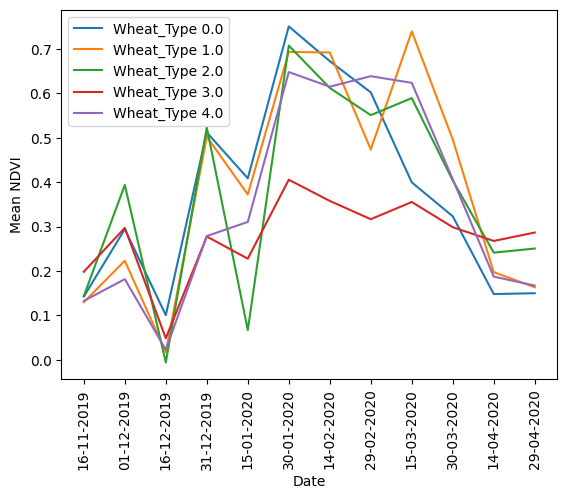

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # plot the NDVI values against their corresponding dates
    plt.plot(date_index, ndvi_values, label=f'Wheat_Type {cluster}')

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.legend()
plt.show()


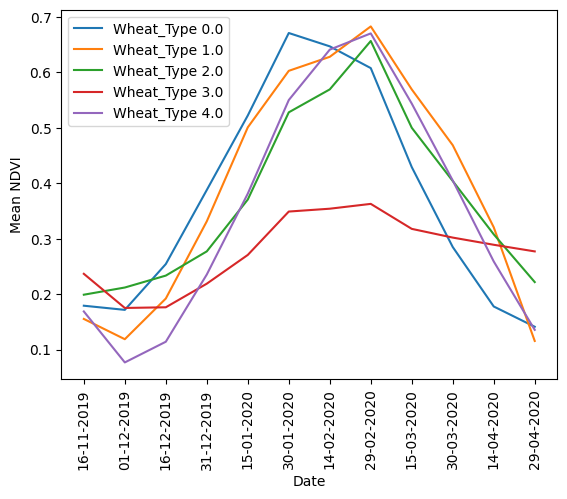

In [ ]:
import numpy as np
from scipy.signal import savgol_filter

# set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 3

# loop through each cluster
for cluster in clusters:
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()

    # apply the Savitzky-Golay filter to smooth the NDVI values
    smoothed_ndvi = savgol_filter(ndvi_values, window_size, poly_order)

    # plot the smoothed NDVI values against their corresponding dates
    plt.plot(date_index, smoothed_ndvi, label=f'Wheat_Type {cluster}')

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.legend()
plt.show()


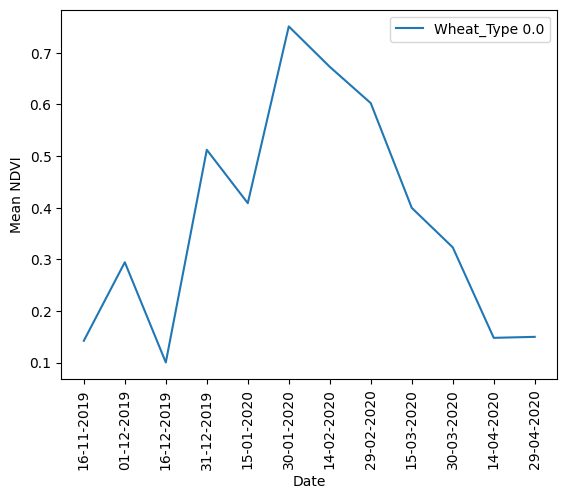

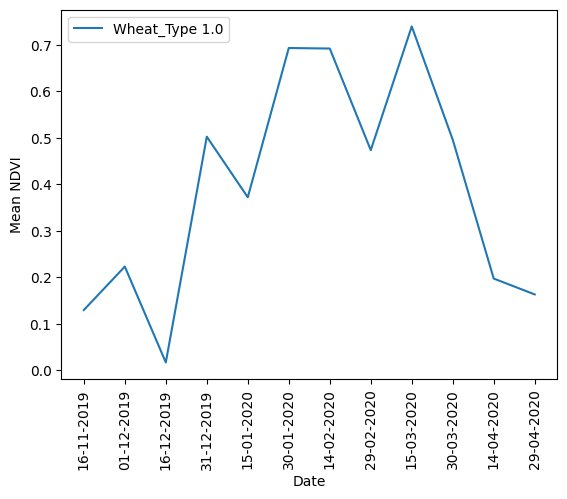

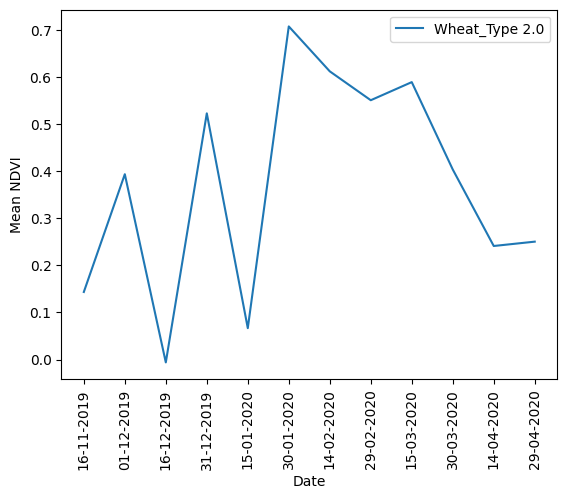

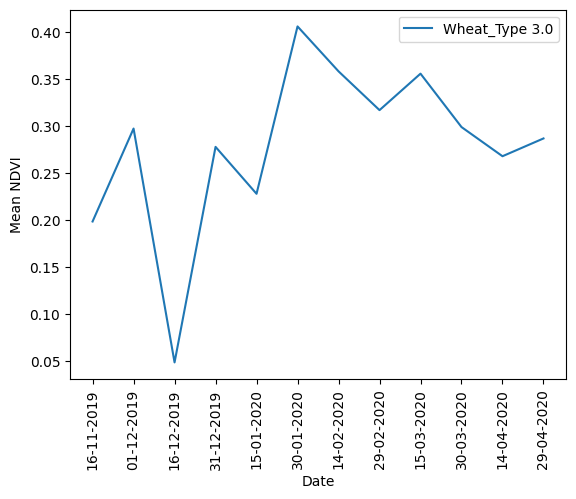

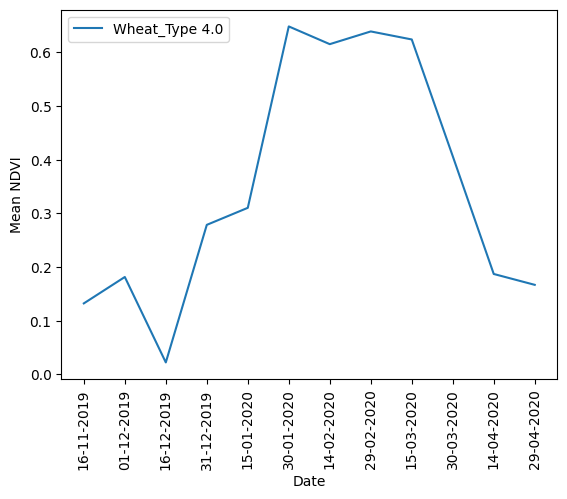

In [ ]:
import matplotlib.pyplot as plt

#get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])


# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # plot the NDVI values against their corresponding dates
    ax.plot(date_index, ndvi_values, label=f'Wheat_Type {cluster}')
    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean NDVI')
    ax.legend()
    plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()



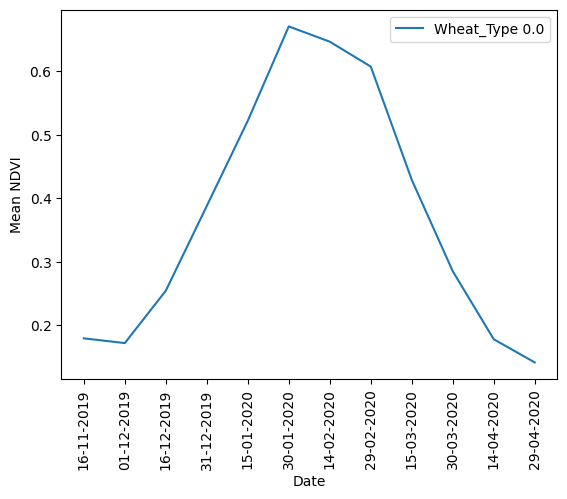

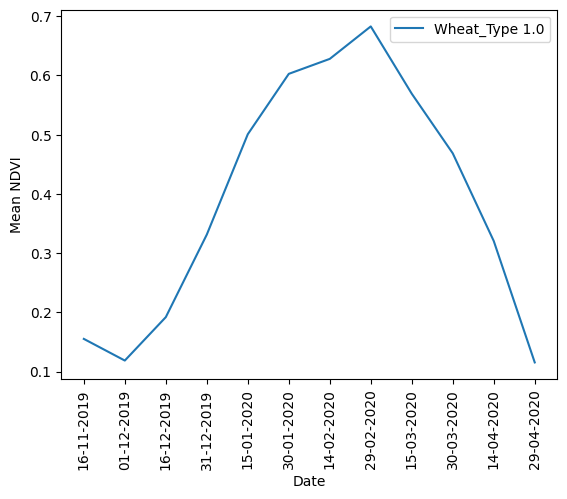

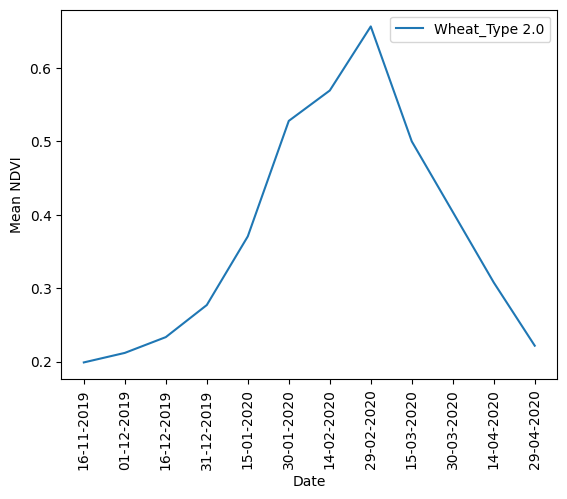

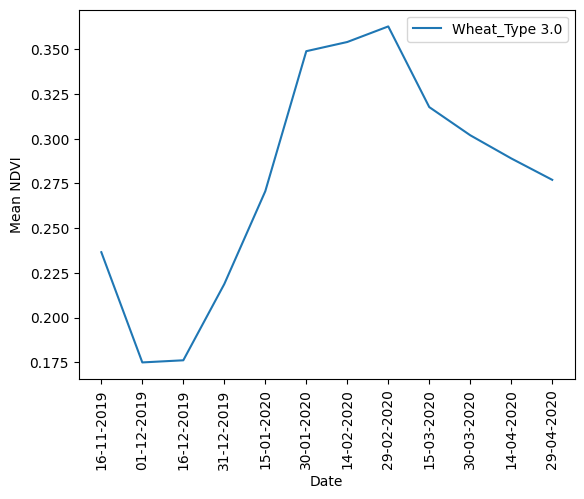

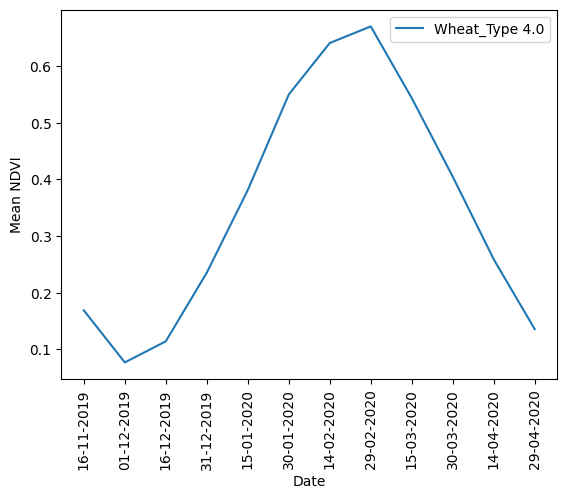

In [ ]:
import numpy as np
from scipy.signal import savgol_filter

# set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 3

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()

    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()

    # apply the Savitzky-Golay filter to smooth the NDVI values
    smoothed_ndvi = savgol_filter(ndvi_values, window_size, poly_order)

    # plot the smoothed NDVI values against their corresponding dates
    ax.plot(date_index, smoothed_ndvi, label=f'Wheat_Type {cluster}')

    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean NDVI')
    ax.legend()
    ax.set_xticks(date_index)
    ax.set_xticklabels(date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()


# **STD wise plot**

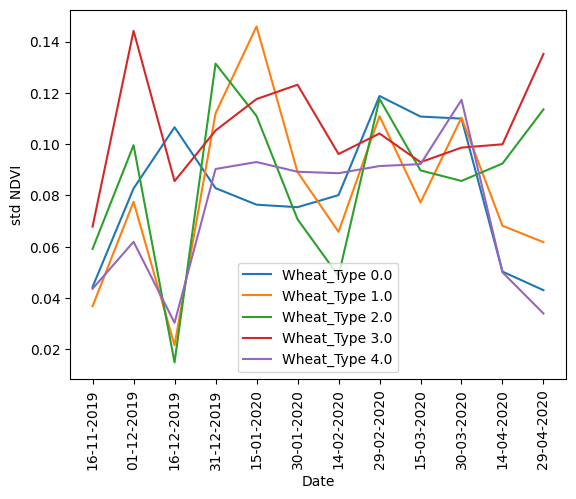

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# get all the dates from the column names
date_index = pd.to_datetime(cluster_std_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_std_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # plot the NDVI values against their corresponding dates
    plt.plot(date_index, ndvi_values, label=f'Wheat_Type {cluster}')

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('std NDVI')
plt.legend()
plt.show()


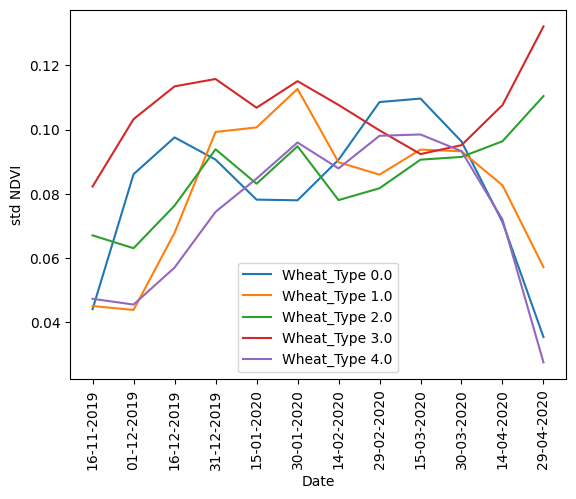

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from scipy.signal import savgol_filter

# set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 3


# get all the dates from the column names
date_index = pd.to_datetime(cluster_std_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_std_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # apply the Savitzky-Golay filter to smooth the NDVI values
    smoothed_ndvi = savgol_filter(ndvi_values, window_size, poly_order)
    # plot the NDVI values against their corresponding dates
    plt.plot(date_index, smoothed_ndvi, label=f'Wheat_Type {cluster}')

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('std NDVI')
plt.legend()
plt.show()


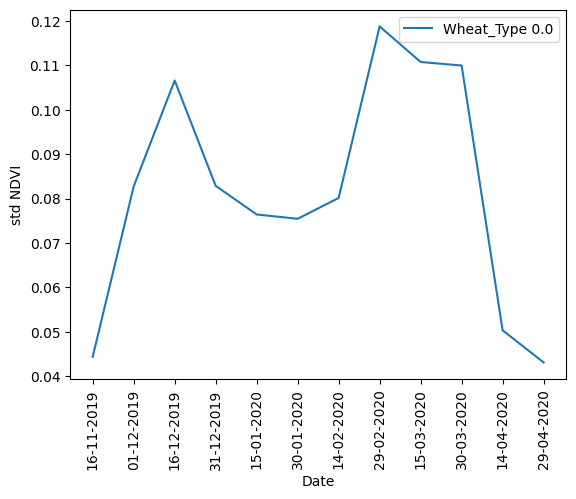

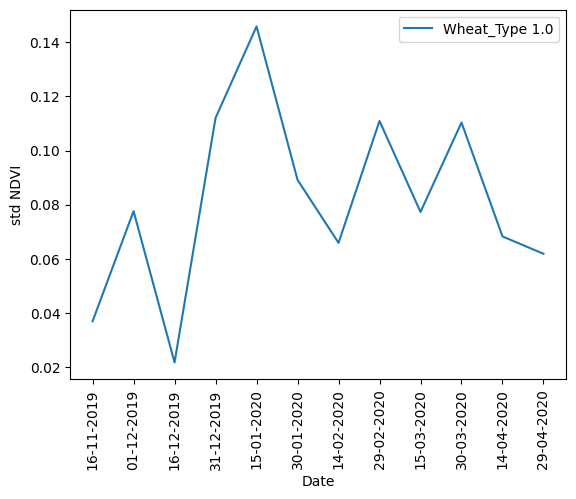

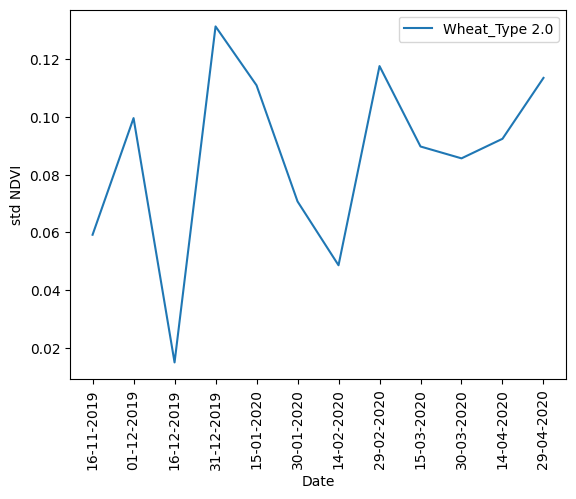

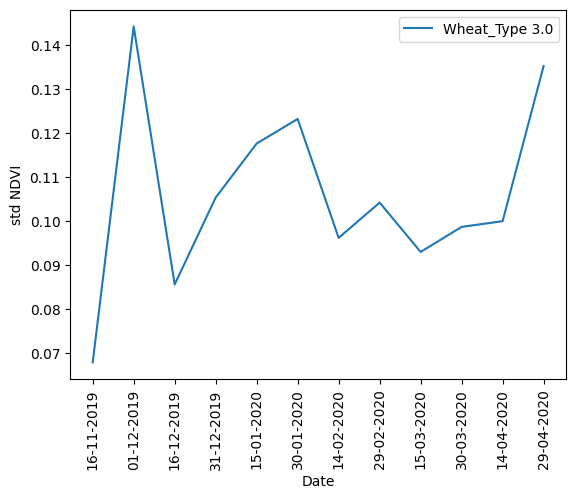

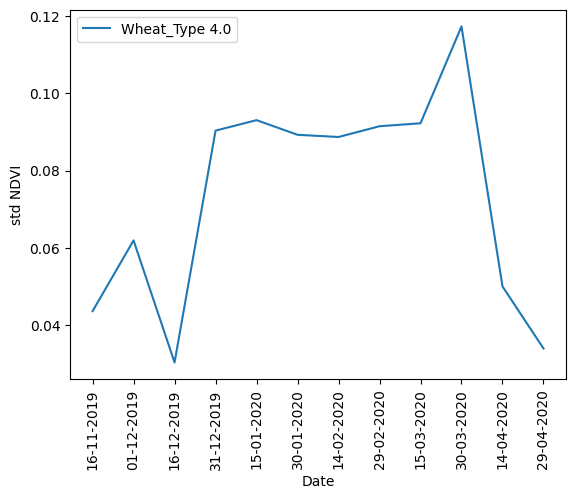

In [ ]:
import matplotlib.pyplot as plt

#get all the dates from the column names
date_index = pd.to_datetime(cluster_std_df.columns[:-1])


# create a list of cluster numbers
clusters = cluster_std_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # plot the NDVI values against their corresponding dates
    ax.plot(date_index, ndvi_values, label=f'Wheat_Type {cluster}')
    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('std NDVI')
    ax.legend()
    plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()



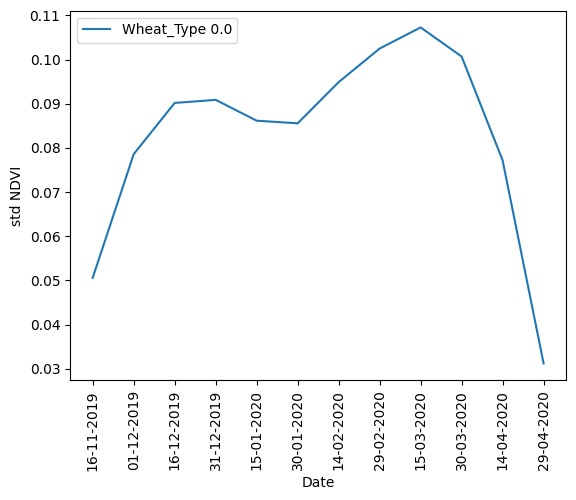

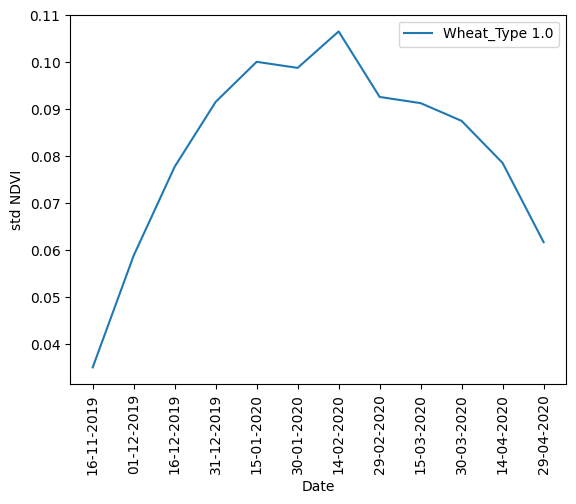

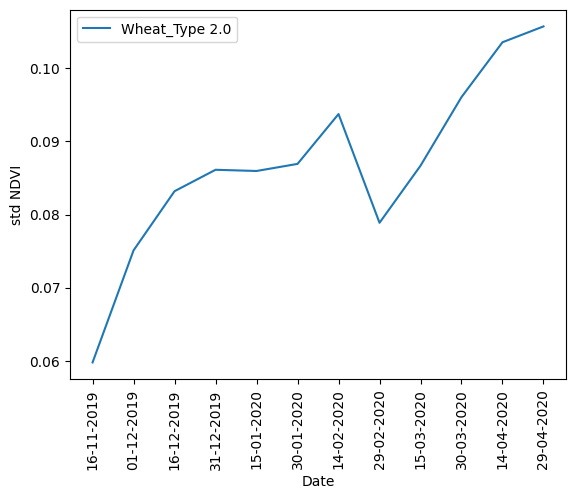

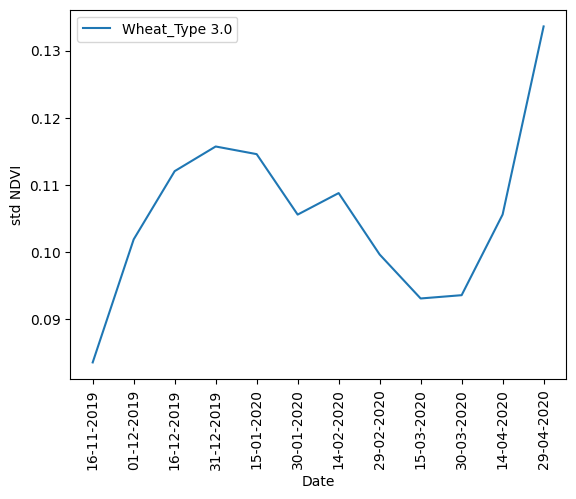

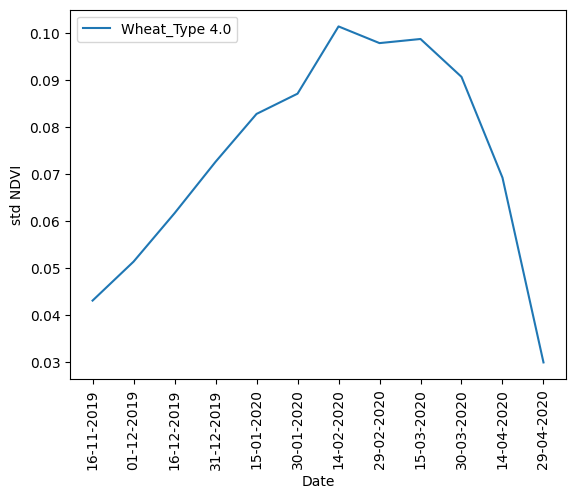

In [ ]:
from scipy.signal import savgol_filter

#get all the dates from the column names
date_index = pd.to_datetime(cluster_std_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_std_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()
    # get the mean NDVI values for the current cluster
    ndvi_values = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # apply the Savitzky-Golay filter to smooth the data
    smoothed_ndvi = savgol_filter(ndvi_values, window_length=9, polyorder=3)
    # plot the smoothed NDVI values against their corresponding dates
    ax.plot(date_index, smoothed_ndvi, label=f'Wheat_Type {cluster}')
    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('std NDVI')
    ax.legend()
    plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()


# **Ribbon Plot**

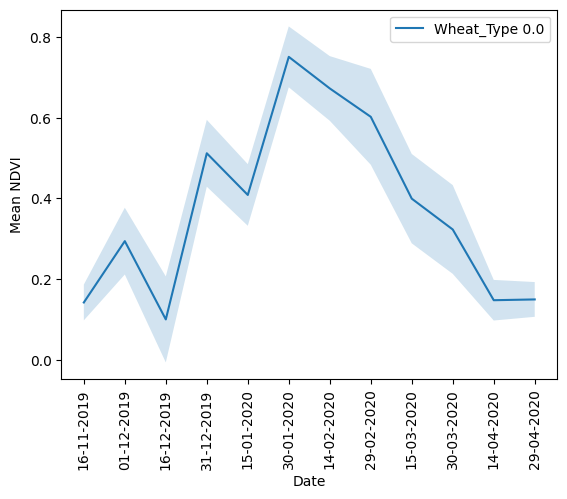

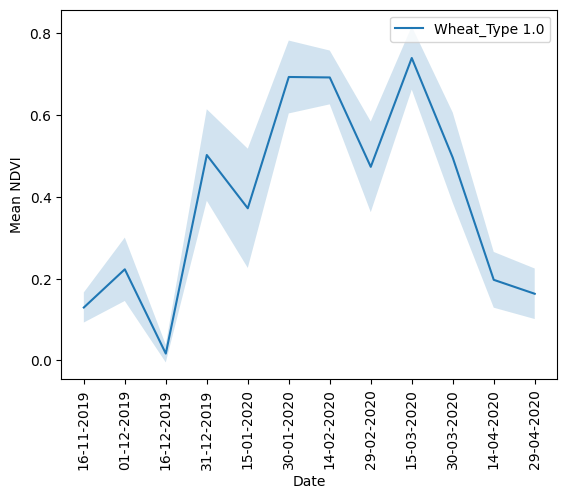

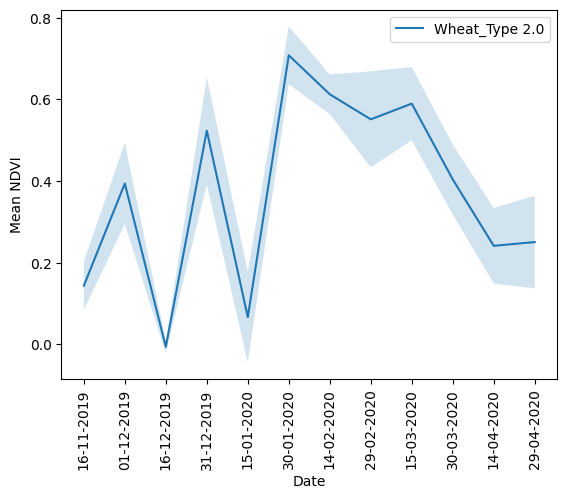

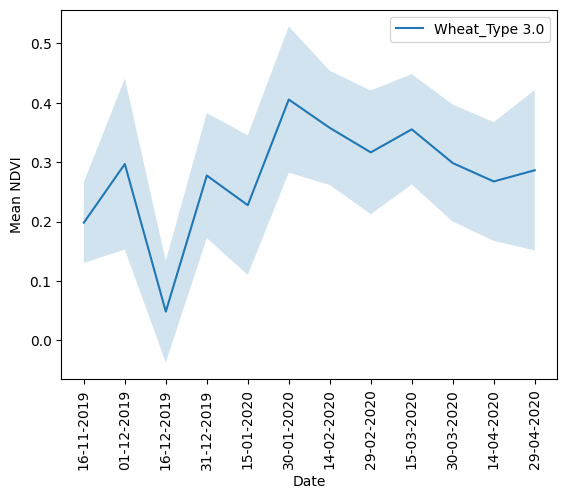

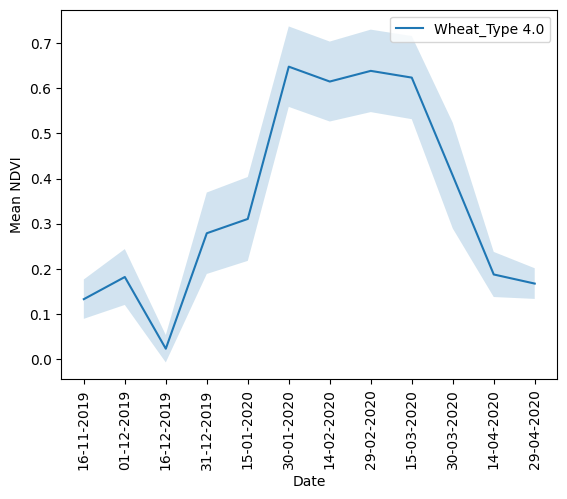

In [ ]:
import matplotlib.pyplot as plt

#get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()
    # get the mean and standard deviation NDVI values for the current cluster
    ndvi_mean = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    ndvi_std = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # plot the mean NDVI values against their corresponding dates
    ax.plot(date_index, ndvi_mean, label=f'Wheat_Type {cluster}')
    # create the ribbon plot using standard deviation values
    ax.fill_between(date_index, ndvi_mean - ndvi_std, ndvi_mean + ndvi_std, alpha=0.2, interpolate=True)
    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean NDVI')
    ax.legend()
    plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()


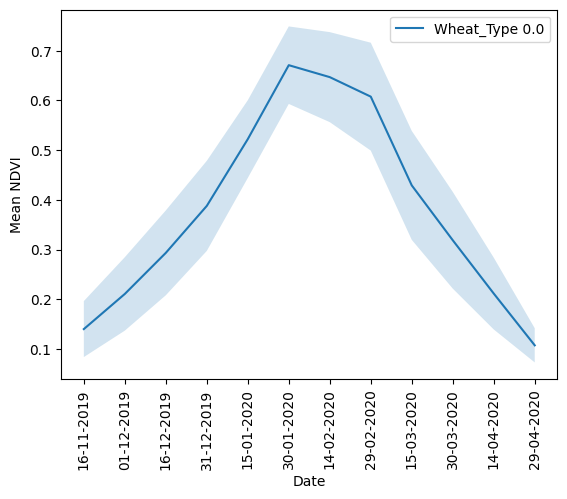

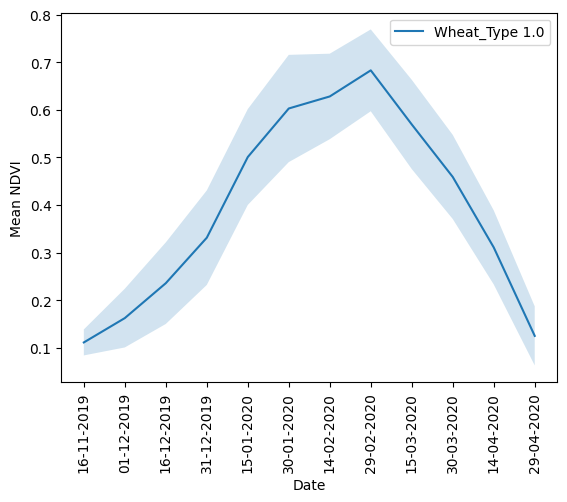

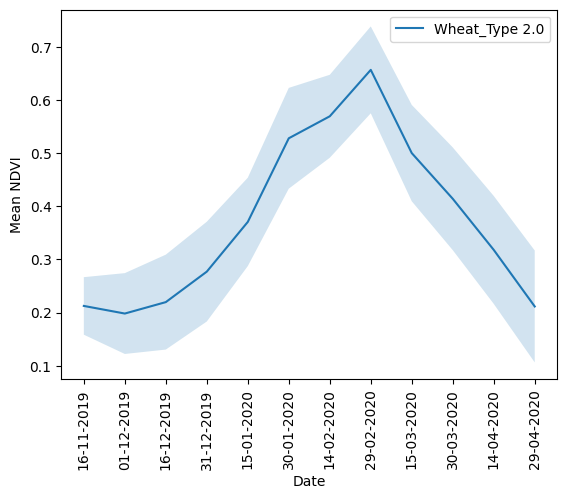

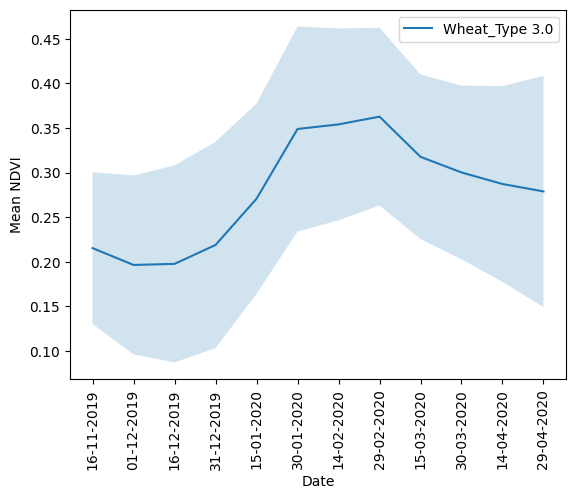

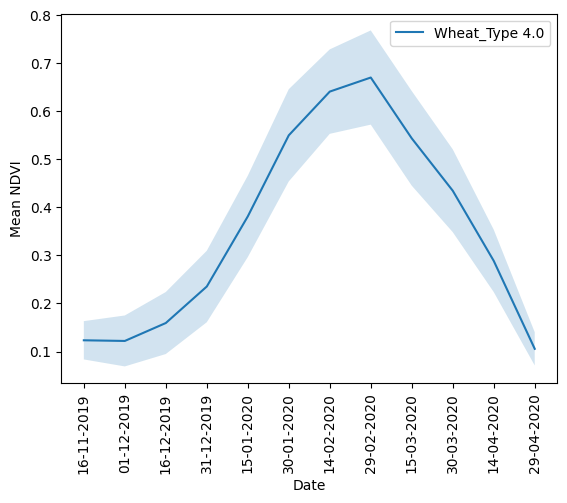

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

# get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 2

# loop through each cluster
for cluster in clusters:
    # create a new figure and axis for the current cluster
    fig, ax = plt.subplots()
    # get the mean and standard deviation NDVI values for the current cluster
    ndvi_mean = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    ndvi_std = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    # apply the Savitzky-Golay filter to smooth the mean and standard deviation values
    ndvi_mean_smooth = savgol_filter(ndvi_mean, window_size, poly_order)
    ndvi_std_smooth = savgol_filter(ndvi_std, window_size, poly_order)
    # plot the mean NDVI values against their corresponding dates
    ax.plot(date_index, ndvi_mean_smooth, label=f'Wheat_Type {cluster}')
    # create the ribbon plot using smoothed standard deviation values
    ax.fill_between(date_index, ndvi_mean_smooth - ndvi_std_smooth, ndvi_mean_smooth + ndvi_std_smooth, alpha=0.2, interpolate=True)
    # add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean NDVI')
    ax.legend()
    plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

    # show the plot
    plt.show()


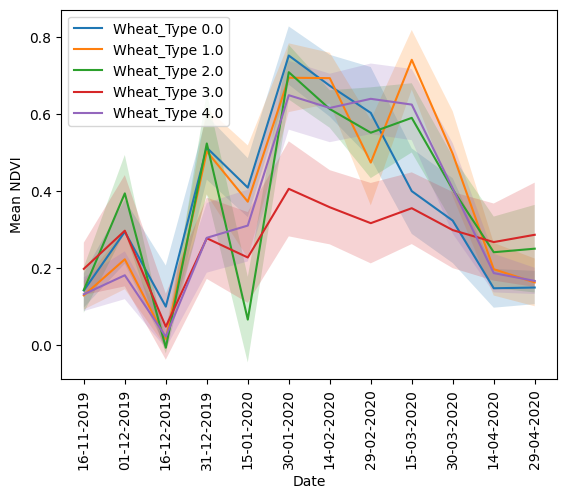

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # get the mean and standard deviation NDVI values for the current cluster
    ndvi_mean = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    ndvi_std = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()

    # plot the NDVI values against their corresponding dates
    plt.plot(date_index, ndvi_mean, label=f'Wheat_Type {cluster}')

    # create a shaded region around the mean line using standard deviation
    lower_bound = ndvi_mean - ndvi_std
    upper_bound = ndvi_mean + ndvi_std
    plt.fill_between(date_index, lower_bound, upper_bound, alpha=0.2, interpolate=True)

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.legend()
plt.show()


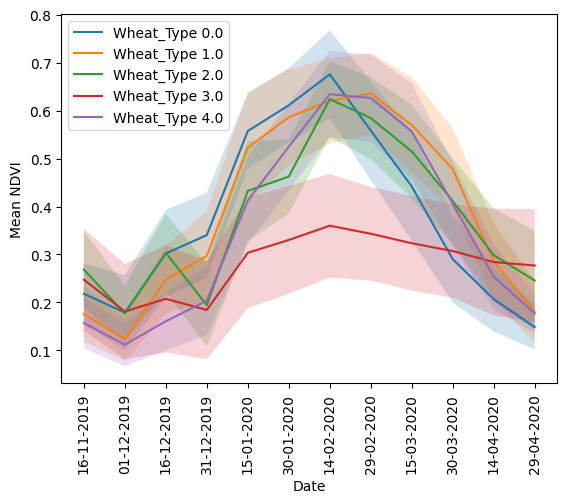

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# get all the dates from the column names
date_index = pd.to_datetime(cluster_mean_df.columns[:-1])

# create a list of cluster numbers
clusters = cluster_mean_df['Wheat_Type'].unique()

# loop through each cluster
for cluster in clusters:
    # get the mean and standard deviation NDVI values for the current cluster
    ndvi_mean = cluster_mean_df[cluster_mean_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()
    ndvi_std = cluster_std_df[cluster_std_df['Wheat_Type']==cluster].iloc[:, :-1].values.flatten()

    # smooth the mean and std values using a moving average filter
    ndvi_mean_smooth = pd.Series(ndvi_mean).rolling(window=3, min_periods=1, center=True).mean().values
    ndvi_std_smooth = pd.Series(ndvi_std).rolling(window=3, min_periods=1, center=True).mean().values

    # plot the smoothed NDVI values against their corresponding dates
    plt.plot(date_index, ndvi_mean_smooth, label=f'Wheat_Type {cluster}')

    # create a shaded region around the mean line using smoothed standard deviation
    lower_bound = ndvi_mean_smooth - ndvi_std_smooth
    upper_bound = ndvi_mean_smooth + ndvi_std_smooth
    plt.fill_between(date_index, lower_bound, upper_bound, alpha=0.2, interpolate=True)

# format the x-axis ticks to show all the dates
plt.xticks(date_index, date_index.strftime('%d-%m-%Y'), rotation=90)

# add axis labels and legend
plt.xlabel('Date')
plt.ylabel('Mean NDVI')
plt.legend()
plt.show()


# **H2O**


In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=e84048421e2caf4a8d532f388e79067c3529f9d6a019336f1f2100cfa0a222c8
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5ow435u0
  JVM stdout: /tmp/tmp5ow435u0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5ow435u0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    22 days
H2O_cluster_name:           H2O_from_python_unknownUser_83rf71
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
hf = h2o.H2OFrame(df_clustered)

# Define the columns to use as predictors and response
predictors = hf.columns[2:-1]
response = 'Wheat_Type'

# Convert the response variable to categorical
hf[response] = hf[response].asfactor()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Split the data into training and validation sets
train, test = hf.split_frame(ratios=[0.8])

# Define the H2O AutoML model and train it on the data
aml = H2OAutoML(max_models=300, seed=1234, project_name='WT_Classification', nfolds=5, verbosity="info")
aml.train(x=predictors, y=response, training_frame=train, validation_frame=test)

AutoML progress: |
18:10:40.445: Project: WT_Classification
18:10:40.447: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
18:10:40.448: Setting stopping tolerance adaptively based on the training frame: 0.05
18:10:40.448: Build control seed: 1234
18:10:40.452: training frame: Frame key: AutoML_1_20230426_181040_training_py_3_sid_8873    cols: 14    rows: 118  chunks: 1    size: 42166  checksum: -229058273362984774
18:10:40.452: validation frame: Frame key: py_4_sid_8873    cols: 14    rows: 27  chunks: 1    size: 10795  checksum: 8352617954530384458
18:10:40.452: leaderboard frame: NULL
18:10:40.459: blending frame: NULL
18:10:40.462: response column: Wheat_Type
18:10:40.463: fold column: null
18:10:40.463: weights column: null
18:10:40.541: Loading execution steps: [{XGBoost : [

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20230426_181040_model_27


Status of Neuron Layers: predicting Wheat_Type, 5-class classification, multinomial distribution, CrossEntropy loss, 1,185 weights/biases, 20.6 KB, 1,181,180 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  ------------------  -------------------  ------------------
    1        11       Input             20.0
    2        20       RectifierDropout  50.0       0.0   0.0   0.0030060358423559756  0.002064351923763752   0.0         -0.0229376359609887   0.563852071762085   -0.7131727878057064  0.8189177513122559
    3        20       RectifierDropout  50.0       0.0   0.0   0.0036097975097800373  0.0036107469350099564  0.0         -0.08465304618687924  0.5282964706420898  0.314396839675295    0.4535248279571533
    4        20       RectifierDropout  50.0       0.0   0.0   0.005851451334965532   0.005374966189265251   0.0         -0.11091718150539237  0.6284506320953369  0.22025982952155423  0.5833773612976074
    5        5        Softmax                      0.0   0.0   0.03827208907576278    0.05317296087741852    0.0         -4.693078974783421    3.1479368209838867  -13.053790393626779  1.4049382209777832

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.25471652682788853
RMSE: 0.5046944886046295
LogLoss: 0.6929039950870995
Mean Per-Class Error: 0.26833333333333337
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    Error      Rate
---  ---  ---  ---  ---  ---------  --------
14   0    1    0    5    0.3        6 / 20
0    0    0    0    35   1          35 / 35
0    0    23   1    0    0.0416667  1 / 24
0    0    0    10   0    0          0 / 10
0    0    0    0    29   0          0 / 29
14   0    24   11   69   0.355932   42 / 118

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.644068
2    0.991525
3    1
4    1
5    1

ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.34028070835931956
RMSE: 0.5833358452549607
LogLoss: 1.088973934929369
Mean Per-Class Error: 0.35
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    Error     Rate
---  ---  ---  ---  ---  --------  -------
2    0    0    0    6    0.75      6 / 8
0    0    0    0    7    1         7 / 7
0    0    4    0    0    0         0 / 4
0    0    0    1    0    0         0 / 1
0    0    0    0    7    0         0 / 7
2    0    4    1    20   0.481481  13 / 27

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.518518
2    0.962963
3    0.962963
4    1
5    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.10051913644594429
RMSE: 0.3170475302631205
LogLoss: 0.32651530176887117
Mean Per-Class Error: 0.07094417077175699
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (ma

In [ ]:
# Print the leaderboard of models generated by H2O AutoML
lb = aml.leaderboard
print(lb.head())

model_id                                                   mean_per_class_error    logloss      rmse        mse
DeepLearning_grid_2_AutoML_1_20230419_141722_model_14                 0.0764399   0.257904  0.291983  0.0852539
DeepLearning_grid_3_AutoML_1_20230419_141722_model_25                 0.092085    0.232206  0.267451  0.0715302
StackedEnsemble_BestOfFamily_1_AutoML_1_20230419_141722               0.100537    0.301949  0.306832  0.0941462
DeepLearning_grid_3_AutoML_1_20230419_141722_model_35                 0.10144     0.305231  0.292055  0.0852964
DeepLearning_grid_2_AutoML_1_20230419_141722_model_38                 0.102085    0.270679  0.284004  0.0806583
DeepLearning_grid_3_AutoML_1_20230419_141722_model_39                 0.102085    0.252953  0.279709  0.0782372
DeepLearning_grid_3_AutoML_1_20230419_141722_model_45                 0.10344     0.330528  0.297543  0.0885319
DeepLearning_grid_2_AutoML_1_20230419_141722_model_27                 0.110891    0.422253  0.340014  0.

In [ ]:
# Use the best model found by AutoML to make predictions on the test set
pred = aml.leader.predict(test)


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [ ]:
pred

predict           p0           p1          p2         p3         p4
---------  -----------  -----------  ----------  ---------  ---------
        4  5.00231e-05  0.00016627   0.00371142  0.0259159  0.970156
        4  7.1848e-05   0.000274659  0.00501007  0.027053   0.96759
        4  2.66646e-05  7.15472e-05  0.00231369  0.0249076  0.97268
        0  0.68733      0.0260713    0.074878    0.0179234  0.193797
        4  0.000261524  0.00134114   0.017854    0.0424992  0.938044
        4  0.00289781   0.00691178   0.201063    0.0808979  0.70823
        0  0.380837     0.0198391    0.307756    0.0541652  0.237403
        2  0.000328635  0.000279443  0.806019    0.129841   0.0635318
        4  0.00102492   0.00320734   0.048922    0.0844213  0.862424
        4  0.299571     0.0930779    0.0433831   0.0273407  0.536627
[27 rows x 6 columns]

In [ ]:
# Convert the H2OFrame of predictions to a pandas DataFrame
pred_df = pred.as_data_frame()

# Get the predicted labels from the predictions DataFrame
labels = pred_df['predict'].values

# Get the predicted probabilities for each label from the predictions DataFrame
probs = pred_df.drop('predict', axis=1).values

In [ ]:
pred_df.to_csv('pred_df.csv')

In [ ]:
# Create a new dataframe with the predicted labels and probabilities
pred_results_df = pd.DataFrame({'label': labels, 'probabilities': probs.tolist()})
pred_results_df

label                                      probabilities
0       4  [5.002313786268618e-05, 0.0001662697747383557,...
1       4  [7.184798146006198e-05, 0.0002746592895892872,...
2       4  [2.666457368962484e-05, 7.154723542713589e-05,...
3       0  [0.6873300195643477, 0.0260712759982275, 0.074...
4       4  [0.000261524175652964, 0.0013411419407781, 0.0...
5       4  [0.00289781293753, 0.006911777618502, 0.201062...
6       0  [0.3808365455859193, 0.0198391308685835, 0.307...
7       2  [0.00032863517144700506, 0.0002794427398611144...
8       4  [0.0010249176993846, 0.0032073442384896, 0.048...
9       4  [0.2995709839037927, 0.0930779260128994, 0.043...
10      4  [0.0154292298728996, 0.2981853911615464, 0.031...
11      4  [0.1127265675860133, 0.0374078939895984, 0.086...
12      4  [0.0041217995556408, 0.0675890085437721, 0.005...
13      4  [0.2775198964316648, 0.0264595257241899, 0.148...
14      4  [0.0122725745107311, 0.2021342198743908, 0.021...
15      4  [0.1565453435135937, 0.0483737655139121, 0.047...
16      4  [0.0112471451089555, 0.228196195287677, 0.0234...
17      4  [0.0006188495333194977, 0.00015456432637222847...
18      2  [0.0006797079915203837, 0.00012248454005071033...
19      2  [0.0029415162329733, 0.0005407434939971133, 0....
20      2  [0.006375609738954, 0.0007115308887174718, 0.8...
21      4  [0.2107553896386366, 0.0091562637177893, 0.009...
22      4  [0.0198173071221521, 0.1249589476691094, 0.020...
23      4  [0.0123747015542464, 0.1796790857416019, 0.022...
24      4  [0.0174338377139946, 0.1254478169973934, 0.019...
25      4  [0.0192983831681255, 0.3355603356610966, 0.034...
26      3  [4.3044647924111196e-20, 1.056210727685432e-25...

In [ ]:
# Merge the predictions DataFrame with the original test DataFrame on the index
test_df = test.as_data_frame()
result_df = test_df.reset_index().merge(pred_results_df, left_index=True, right_index=True)


In [ ]:
result_df

index                                Polygon Coordinates  2019-11-16  \
0       0  [(75.71498740425533, 29.45409703865067), (75.7...    0.117053   
1       1  [(75.79226808230524, 29.062391784675576), (75....    0.114441   
2       2  [(75.97745456238138, 28.839722126843366), (75....    0.117452   
3       3  [(76.01165589285691, 27.949373434014348), (76....    0.121220   
4       4  [(76.30058774453187, 28.720097791222766), (76....    0.068815   
5       5  [(76.34364044655293, 29.67591506364083), (76.3...    0.152657   
6       6  [(76.45252715184047, 28.25816609846606), (76.4...    0.101174   
7       7  [(76.51021459240808, 29.81433891392125), (76.5...    0.373684   
8       8  [(76.52023418951245, 28.495002359356576), (76....    0.094123   
9       9  [(76.68217533308112, 28.160311202713228), (76....    0.178383   
10     10  [(76.75314194394852, 29.2992815399949), (76.75...    0.127344   
11     11  [(76.75662008409009, 28.35841120008715), (76.7...    0.070916   
12     12  [(76.81962713473385, 28.688661104058184), (76....    0.149429   
13     13  [(76.85276275766459, 30.863039182451534), (76....    0.076733   
14     14  [(76.86733503171865, 29.18925320200981), (76.8...    0.120259   
15     15  [(76.87009080649281, 30.851628376264387), (76....    0.071097   
16     16  [(76.88313813594104, 29.004659769083894), (76....    0.152318   
17     17  [(76.88775770977078, 30.855810962604973), (76....    0.081118   
18     18  [(76.94245310019701, 30.583926199005717), (76....    0.173584   
19     19  [(76.96080230981165, 30.56678097067801), (76.9...    0.079372   
20     20  [(76.97738119092236, 30.547312528780463), (76....    0.096554   
21     21  [(77.01166282169656, 28.028892510469305), (77....    0.200011   
22     22  [(77.02599882456941, 29.379692492536286), (77....    0.156227   
23     23  [(77.05081372620039, 29.280058321918293), (77....    0.175583   
24     24  [(77.0631609434868, 29.382225214273866), (77.0...    0.152245   
25     25  [(77.13600924561867, 28.959975161961193), (77....    0.160578   
26     26  [(77.45323418611937, 28.27952968033599), (77.4...    0.314878   

    2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  2020-02-14  \
0     0.153823    0.015387    0.204209    0.338795    0.748971    0.594371   
1     0.179140    0.010543    0.238558    0.287948    0.576853    0.590511   
2     0.155516    0.021588    0.161429    0.227481    0.720937    0.625441   
3     0.214924    0.181624    0.529113    0.403702    0.760660    0.730489   
4     0.120372   -0.014330    0.400422    0.334541    0.700155    0.603312   
5     0.285312    0.016077    0.410100    0.337796    0.698213    0.666806   
6     0.192224    0.019589    0.497755    0.352084    0.884319    0.773173   
7     0.637384    0.029762    0.625495    0.379536    0.721720    0.541201   
8     0.164568   -0.003358    0.334419    0.239888    0.687023    0.610231   
9     0.191855   -0.004294    0.410940    0.388289    0.678695    0.658209   
10    0.315550    0.026937    0.575141    0.537334    0.637182    0.708554   
11    0.231329   -0.023731    0.470375    0.371151    0.860362    0.637935   
12    0.113311    0.008561    0.169976    0.382336    0.728889    0.675561   
13    0.349161    0.135801    0.448441    0.457569    0.648868    0.554873   
14    0.185326    0.061966    0.530156    0.403771    0.566209    0.730505   
15    0.285996    0.240805    0.485703    0.437374    0.595235    0.570368   
16    0.252300    0.015368    0.484996    0.581460    0.529177    0.726113   
17    0.257578    0.174260    0.368528    0.396565    0.630483    0.543955   
18    0.505326   -0.013393    0.560614    0.021339    0.773536    0.599562   
19    0.304313   -0.012189    0.498894    0.040479    0.700572    0.530006   
20    0.441725   -0.004282    0.498084    0.002160    0.753811    0.553226   
21    0.182138    0.181883    0.405733    0.507521    0.640339    0.691437   
22    0.272007    0.005665    0.529072    0.306097    0.585855    0.597439   
23 

In [ ]:
new_result_df = result_df.drop(['Wheat_Type', 'probabilities'], axis=1)

# Print the new DataFrame
new_result_df

index                                Polygon Coordinates  2019-11-16  \
0       0  [(75.71498740425533, 29.45409703865067), (75.7...    0.117053   
1       1  [(75.79226808230524, 29.062391784675576), (75....    0.114441   
2       2  [(75.97745456238138, 28.839722126843366), (75....    0.117452   
3       3  [(76.01165589285691, 27.949373434014348), (76....    0.121220   
4       4  [(76.30058774453187, 28.720097791222766), (76....    0.068815   
5       5  [(76.34364044655293, 29.67591506364083), (76.3...    0.152657   
6       6  [(76.45252715184047, 28.25816609846606), (76.4...    0.101174   
7       7  [(76.51021459240808, 29.81433891392125), (76.5...    0.373684   
8       8  [(76.52023418951245, 28.495002359356576), (76....    0.094123   
9       9  [(76.68217533308112, 28.160311202713228), (76....    0.178383   
10     10  [(76.75314194394852, 29.2992815399949), (76.75...    0.127344   
11     11  [(76.75662008409009, 28.35841120008715), (76.7...    0.070916   
12     12  [(76.81962713473385, 28.688661104058184), (76....    0.149429   
13     13  [(76.85276275766459, 30.863039182451534), (76....    0.076733   
14     14  [(76.86733503171865, 29.18925320200981), (76.8...    0.120259   
15     15  [(76.87009080649281, 30.851628376264387), (76....    0.071097   
16     16  [(76.88313813594104, 29.004659769083894), (76....    0.152318   
17     17  [(76.88775770977078, 30.855810962604973), (76....    0.081118   
18     18  [(76.94245310019701, 30.583926199005717), (76....    0.173584   
19     19  [(76.96080230981165, 30.56678097067801), (76.9...    0.079372   
20     20  [(76.97738119092236, 30.547312528780463), (76....    0.096554   
21     21  [(77.01166282169656, 28.028892510469305), (77....    0.200011   
22     22  [(77.02599882456941, 29.379692492536286), (77....    0.156227   
23     23  [(77.05081372620039, 29.280058321918293), (77....    0.175583   
24     24  [(77.0631609434868, 29.382225214273866), (77.0...    0.152245   
25     25  [(77.13600924561867, 28.959975161961193), (77....    0.160578   
26     26  [(77.45323418611937, 28.27952968033599), (77.4...    0.314878   

    2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  2020-02-14  \
0     0.153823    0.015387    0.204209    0.338795    0.748971    0.594371   
1     0.179140    0.010543    0.238558    0.287948    0.576853    0.590511   
2     0.155516    0.021588    0.161429    0.227481    0.720937    0.625441   
3     0.214924    0.181624    0.529113    0.403702    0.760660    0.730489   
4     0.120372   -0.014330    0.400422    0.334541    0.700155    0.603312   
5     0.285312    0.016077    0.410100    0.337796    0.698213    0.666806   
6     0.192224    0.019589    0.497755    0.352084    0.884319    0.773173   
7     0.637384    0.029762    0.625495    0.379536    0.721720    0.541201   
8     0.164568   -0.003358    0.334419    0.239888    0.687023    0.610231   
9     0.191855   -0.004294    0.410940    0.388289    0.678695    0.658209   
10    0.315550    0.026937    0.575141    0.537334    0.637182    0.708554   
11    0.231329   -0.023731    0.470375    0.371151    0.860362    0.637935   
12    0.113311    0.008561    0.169976    0.382336    0.728889    0.675561   
13    0.349161    0.135801    0.448441    0.457569    0.648868    0.554873   
14    0.185326    0.061966    0.530156    0.403771    0.566209    0.730505   
15    0.285996    0.240805    0.485703    0.437374    0.595235    0.570368   
16    0.252300    0.015368    0.484996    0.581460    0.529177    0.726113   
17    0.257578    0.174260    0.368528    0.396565    0.630483    0.543955   
18    0.505326   -0.013393    0.560614    0.021339    0.773536    0.599562   
19    0.304313   -0.012189    0.498894    0.040479    0.700572    0.530006   
20    0.441725   -0.004282    0.498084    0.002160    0.753811    0.553226   
21    0.182138    0.181883    0.405733    0.507521    0.640339    0.691437   
22    0.272007    0.005665    0.529072    0.306097    0.585855    0.597439   
23 

In [ ]:
new_result_df.to_csv('new_result_df.csv')

In [ ]:
new_result_df = new_result_df.rename(columns={'Polygon Coordinates': 'polygon_coordinates'})


# Image

In [ ]:
new_result_df = pd.read_csv('new_result_df.csv')

In [ ]:
new_result_df

index                                polygon_coordinates  2019-11-16  \
0       0  [(75.71498740425533, 29.45409703865067), (75.7...    0.117053   
1       1  [(75.79226808230524, 29.062391784675576), (75....    0.114441   
2       2  [(75.97745456238138, 28.839722126843366), (75....    0.117452   
3       3  [(76.01165589285691, 27.949373434014348), (76....    0.121220   
4       4  [(76.30058774453187, 28.720097791222766), (76....    0.068815   
5       5  [(76.34364044655293, 29.67591506364083), (76.3...    0.152657   
6       6  [(76.45252715184047, 28.25816609846606), (76.4...    0.101174   
7       7  [(76.51021459240808, 29.81433891392125), (76.5...    0.373684   
8       8  [(76.52023418951245, 28.495002359356576), (76....    0.094123   
9       9  [(76.68217533308112, 28.160311202713228), (76....    0.178383   
10     10  [(76.75314194394852, 29.2992815399949), (76.75...    0.127344   
11     11  [(76.75662008409009, 28.35841120008715), (76.7...    0.070916   
12     12  [(76.81962713473385, 28.688661104058184), (76....    0.149429   
13     13  [(76.85276275766459, 30.863039182451534), (76....    0.076733   
14     14  [(76.86733503171865, 29.18925320200981), (76.8...    0.120259   
15     15  [(76.87009080649281, 30.851628376264387), (76....    0.071097   
16     16  [(76.88313813594104, 29.004659769083894), (76....    0.152318   
17     17  [(76.88775770977078, 30.855810962604973), (76....    0.081118   
18     18  [(76.94245310019701, 30.583926199005717), (76....    0.173584   
19     19  [(76.96080230981165, 30.56678097067801), (76.9...    0.079372   
20     20  [(76.97738119092236, 30.547312528780463), (76....    0.096554   
21     21  [(77.01166282169656, 28.028892510469305), (77....    0.200011   
22     22  [(77.02599882456941, 29.379692492536286), (77....    0.156227   
23     23  [(77.05081372620039, 29.280058321918293), (77....    0.175583   
24     24  [(77.0631609434868, 29.382225214273866), (77.0...    0.152245   
25     25  [(77.13600924561867, 28.959975161961193), (77....    0.160578   
26     26  [(77.45323418611937, 28.27952968033599), (77.4...    0.314878   

    2019-12-01  2019-12-16  2019-12-31  2020-01-15  2020-01-30  2020-02-14  \
0     0.153823    0.015387    0.204209    0.338795    0.748971    0.594371   
1     0.179140    0.010543    0.238558    0.287948    0.576853    0.590511   
2     0.155516    0.021588    0.161429    0.227481    0.720937    0.625441   
3     0.214924    0.181624    0.529113    0.403702    0.760660    0.730489   
4     0.120372   -0.014330    0.400422    0.334541    0.700155    0.603312   
5     0.285312    0.016077    0.410100    0.337796    0.698213    0.666806   
6     0.192224    0.019589    0.497755    0.352084    0.884319    0.773173   
7     0.637384    0.029762    0.625495    0.379536    0.721720    0.541201   
8     0.164568   -0.003358    0.334419    0.239888    0.687023    0.610231   
9     0.191855   -0.004294    0.410940    0.388289    0.678695    0.658209   
10    0.315550    0.026937    0.575141    0.537334    0.637182    0.708554   
11    0.231329   -0.023731    0.470375    0.371151    0.860362    0.637935   
12    0.113311    0.008561    0.169976    0.382336    0.728889    0.675561   
13    0.349161    0.135801    0.448441    0.457569    0.648868    0.554873   
14    0.185326    0.061966    0.530156    0.403771    0.566209    0.730505   
15    0.285996    0.240805    0.485703    0.437374    0.595235    0.570368   
16    0.252300    0.015368    0.484996    0.581460    0.529177    0.726113   
17    0.257578    0.174260    0.368528    0.396565    0.630483    0.543955   
18    0.505326   -0.013393    0.560614    0.021339    0.773536    0.599562   
19    0.304313   -0.012189    0.498894    0.040479    0.700572    0.530006   
20    0.441725   -0.004282    0.498084    0.002160    0.753811    0.553226   
21    0.182138    0.181883    0.405733    0.507521    0.640339    0.691437   
22    0.272007    0.005665    0.529072    0.306097    0.585855    0.597439   
23 

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon
import geemap

import ast

# Convert the polygon coordinates to a list of floating point numbers
new_result_df['polygon_coordinates'] = new_result_df['polygon_coordinates'].apply(lambda x: ast.literal_eval(x))

# Create a list of shapely Polygon objects from your polygon coordinates
polygons = [Polygon(coords) for coords in new_result_df['polygon_coordinates']]

# Create a GeoDataFrame from the polygons
gdf = gpd.GeoDataFrame(geometry=polygons, crs='epsg:4326')



In [ ]:

gdf

geometry
0   POLYGON ((75.71499 29.45410, 75.71501 29.45347...
1   POLYGON ((75.79227 29.06239, 75.79275 29.06278...
2   POLYGON ((75.97745 28.83972, 75.97811 28.83956...
3   POLYGON ((76.01166 27.94937, 76.01227 27.94927...
4   POLYGON ((76.30059 28.72010, 76.30059 28.71958...
5   POLYGON ((76.34364 29.67592, 76.34439 29.67591...
6   POLYGON ((76.45253 28.25817, 76.45305 28.25817...
7   POLYGON ((76.51021 29.81434, 76.51092 29.81413...
8   POLYGON ((76.52023 28.49500, 76.52056 28.49501...
9   POLYGON ((76.68218 28.16031, 76.68273 28.16006...
10  POLYGON ((76.75314 29.29928, 76.75317 29.29877...
11  POLYGON ((76.75662 28.35841, 76.75665 28.35797...
12  POLYGON ((76.81963 28.68866, 76.81969 28.68834...
13  POLYGON ((76.85276 30.86304, 76.85284 30.86249...
14  POLYGON ((76.86734 29.18925, 76.86735 29.18897...
15  POLYGON ((76.87009 30.85163, 76.87027 30.85115...
16  POLYGON ((76.88314 29.00466, 76.88316 29.00425...
17  POLYGON ((76.88776 30.85581, 76.88783 30.85557...
18  POLYGON ((76.94245 30.58393, 76.94262 30.58388...
19  POLYGON ((76.96080 30.56678, 76.96132 30.56630...
20  POLYGON ((76.97738 30.54731, 76.97739 30.54706...
21  POLYGON ((77.01166 28.02889, 77.01193 28.02888...
22  POLYGON ((77.02600 29.37969, 77.02627 29.37968...
23  POLYGON ((77.05081 29.28006, 77.05124 29.28004...
24  POLYGON ((77.06316 29.38223, 77.06317 29.38172...
25  POLYGON ((77.13601 28.95998, 77.13625 28.95993...
26  POLYGON ((77.45323 28.27953, 77.45324 28.27934...

In [ ]:
import geemap
import pandas as pd

Map = geemap.Map()



IMAGE

In [ ]:
import pandas as pd


In [ ]:
import geemap
import pandas as pd

# Load the polygon from the dataframe
# Create a list of ee.Geometry.Polygon objects from the polygon coordinates
polygons = []
for coords in new_result_df['polygon_coordinates']:
  polygon = ee.Geometry.Polygon(coords)
  polygons.append(polygon)

# Extract the NDVI values from the dataframe
ndvi_values = new_result_df.iloc[:,0:-1].values.tolist()

# Define the visualization parameters

# Get the bounding box of all the polygons
merged_polygons = ee.Geometry.MultiPolygon(polygons)
bbox = merged_polygons.bounds()


In [ ]:
# Create a buffer around the merged polygons
buffered_polygons = merged_polygons.buffer(1000)
bbox = buffered_polygons.bounds()


In [ ]:
import geemap

# Load the Sentinel-2 image collection for the corresponding time period and bounding box
s2_collection = S2_g.filterBounds(bbox).select('NDVI')

# Sort the image collection by date
s2_collection = s2_collection.sort('system:time_start')

# Mosaic the image collection into a single image with one band per image
ndvi_image = s2_collection.mosaic()

# Set the visualization parameters for the NDVI bands
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'yellow', 'green']
}

# Display the NDVI image with its corresponding palette color
Map = geemap.Map()
Map.addLayer(ndvi_image, ndvi_vis_params, 'NDVI3')
Map.centerObject(merged_polygons)

Map.addLayerControl()



In [ ]:
# Load the polygon from the dataframe
# Create a list of ee.Geometry.Polygon objects from the polygon coordinates
polygons = []
for coords in new_result_df['polygon_coordinates']:
    polygon = ee.Geometry.Polygon(coords)
    polygons.append(polygon)

# Extract the NDVI values from the dataframe
ndvi_values = new_result_df.iloc[:,0:-1].values.tolist()

# Define the visualization parameters

# Get the bounding box of all the polygons
merged_polygons = ee.Geometry.MultiPolygon(polygons)
bbox = merged_polygons.bounds()

# Load the Sentinel-2 image collection for the corresponding time period and bounding box
s2_collection = S2_g.filterBounds(bbox).select('NDVI')

# Sort the image collection by date
s2_collection = s2_collection.sort('system:time_start')

# Mosaic the image collection into a single image with one band per image
ndvi_image = s2_collection.mosaic()

# Apply the crop mask to the NDVI image
esri_lulc2020 = ee.ImageCollection("projects/sat-io/open-datasets/landcover/ESRI_Global-LULC_10m")
lulc = esri_lulc2020.mosaic().clip(bbox)
img1 = lulc.lt(6)
img2 = lulc.updateMask(img1)
img3 = img2.gt(4)
crop_mask = img2.updateMask(img3)
ndvi_image = ndvi_image.updateMask(crop_mask)


# Set the visualization parameters for the NDVI bands
ndvi_vis_params = {
    'min': -1,
    'max': 1,
    'palette': ['red', 'yellow', 'green']
}

# Display the NDVI image with its corresponding palette color
Map = geemap.Map()
Map.addLayer(ndvi_image, ndvi_vis_params, 'NDVI_M')
Map.centerObject(merged_polygons)

Map.addLayerControl()
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
NDVI= ee.Image("projects/ee-unnatiisro/assets/NDVI_13_28_j_12_27_f_14_m_13_28_a_13_m_2022")
Map.centerObject(NDVI, 10)
Map.addLayer(NDVI, {}, 'NDVI')
Map

Map(center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position', 'transparent_b…

# classified

In [ ]:
import geemap
import pandas as pd

# Load the polygon from the dataframe
# Create a list of ee.Geometry.Polygon objects from the polygon coordinates
polygons = []
for coords in new_result_df['polygon_coordinates']:
    polygon = ee.Geometry.Polygon(coords)
    polygons.append(polygon)

# Extract the NDVI and label values from the dataframe
ndvi_values = new_result_df.iloc[:,0:-1].values.tolist()
label_values = new_result_df['label'].tolist()

# Define the visualization parameters for each label
label_colors = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'yellow',
    4: 'purple'
}

# Create a list of feature collections, each corresponding to a label
label_features = []
for label in range(5):
    # Filter the polygons and NDVI values by label
    filtered_polygons = [polygons[i] for i in range(len(polygons)) if label_values[i] == label]
    filtered_ndvi = [ndvi_values[i] for i in range(len(ndvi_values)) if label_values[i] == label]

    # Create a feature collection from the filtered polygons and NDVI values
    features = []
    for i in range(len(filtered_polygons)):
        feature = ee.Feature(filtered_polygons[i], {'NDVI': filtered_ndvi[i][0]})
        features.append(feature)
    feature_collection = ee.FeatureCollection(features)

    # Add the feature collection and visualization parameters to the label_features list
    label_features.append({
        'feature_collection': feature_collection,
        'color': label_colors[label]
    })

# Get the bounding box of all the polygons
merged_polygons = ee.Geometry.MultiPolygon(polygons)
bbox = merged_polygons.bounds()

# Create a buffer around the merged polygons
buffered_polygons = merged_polygons.buffer(1000)
bbox = buffered_polygons.bounds()

# Create the map
Map = geemap.Map()
Map.centerObject(buffered_polygons)

# Add each feature collection to the map with its corresponding color and opacity
for label_feature in label_features:
  Map.addLayer(label_feature['feature_collection'],
               {'color': label_feature['color'], 'fillColor': label_feature['color'] + '66'},
               'Label ' + str(label_feature['color']))

# Display the map
Map.addLayerControl()
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [ ]:
c1= ee.Image("projects/ee-unnatiisro/assets/class1_prob")
Map.centerObject(c1, 10)
Map.addLayer(c1, {}, 'c1')
Map

Map(bottom=13819.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position'…

In [ ]:
c2 = ee.Image("projects/ee-unnatiisro/assets/class2_prob")
Map.centerObject(c2, 10)
Map.addLayer(c2, {}, 'c2')
Map

Map(bottom=108753.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position…

In [ ]:
c3= ee.Image("projects/ee-unnatiisro/assets/class3_prob")
Map.centerObject(c3, 10)
Map.addLayer(c3, {}, 'c3')
Map

Map(bottom=108753.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position…

In [ ]:
c4= ee.Image("projects/ee-unnatiisro/assets/class4_prob")
Map.centerObject(c4, 10)
Map.addLayer(c4, {}, 'c4')
Map

Map(bottom=108753.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position…

In [ ]:
c5= ee.Image("projects/ee-unnatiisro/assets/predicted_classes")
label_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'yellow',
    5: 'purple'
}
Map.centerObject(c5, 10)
Map.addLayer(c5, label_colors, 'c5')
Map

Map(bottom=108753.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position…

In [ ]:
Pre = ee.Image("projects/ee-unnatiisro/assets/predicted_classes")
label_colors = {
    'min' : 0,
    'max' : 4,
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'yellow',
    4: 'purple'
}

Map.centerObject(Pre, 10)
Map.addLayer(Pre, label_colors, 'Pre')
Map

Map(bottom=108753.0, center=[29.644181378027046, 76.8690634332025], controls=(WidgetControl(options=['position…